In [1]:
import sys
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import listdir
from keras import models, layers, Sequential
from os.path import join, isfile
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import datetime
print(tf.__version__)

2.8.0


In [ ]:
def getImgs(parent_folder_path):
    imgs = []
    for f in listdir(parent_folder_path):
        if isfile(join(parent_folder_path, f)):
            path = join(parent_folder_path, f)
            img = load_img(path, target_size=(200, 200))
            img_arr = img_to_array(img)
        imgs.append(img_arr)
    return np.array(imgs)

cat_imgs = getImgs('/home/techn/Pictures/PetImages/Cat')[:5000]
dog_imgs = getImgs('/home/techn/Pictures/PetImages/Dog')[:5000]
# cat_imgs = getImgs('D:\\Downloads\\kagglecatsanddogs_3367a\\PetImages\\Cat')[:5000]
# dog_imgs = getImgs('D:\\Downloads\\kagglecatsanddogs_3367a\\PetImages\\Dog')[:5000]
np.save('cat_photos.npy', cat_imgs)
np.save('dog_photos.npy', dog_imgs)

In [2]:
cat_imgs = np.load('cat_photos.npy')
dog_imgs = np.load('dog_photos.npy')
len(cat_imgs), len(dog_imgs)

(5000, 5000)

In [3]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.tight_layout()
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()
    
def kfold(network, cat_imgs, dog_imgs, batch_size=512):
    kf = KFold(n_splits=5)
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    n = 0
    fold_times = []
    for train_idx, test_idx in kf.split(cat_imgs):
        start = datetime.datetime.now()
        print(f"Fold {n}")
        print(f"Test Index Start:{test_idx[0]}")
        print(f"Test Set Size:{len(test_idx)}")
        train_imgs = np.append(cat_imgs[train_idx], dog_imgs[train_idx], axis=0)
        train_labels = np.append(np.full(len(train_idx), 0), np.full(len(train_idx), 1))

        test_imgs = np.append(cat_imgs[test_idx], dog_imgs[test_idx], axis=0)
        test_labels = np.append(np.full(len(test_idx), 0), np.full(len(test_idx), 1))

        train_it = datagen.flow(train_imgs, train_labels, batch_size=batch_size)
        test_it = datagen.flow(test_imgs, test_labels, batch_size=batch_size)
        history = network.fit(train_it, steps_per_epoch=len(train_it), validation_data=test_it,
                              validation_steps=len(test_it), epochs=20, verbose=0)
        summarize_diagnostics(history)
        train_loss, train_acc = network.evaluate(train_imgs, train_labels)
        test_loss, test_acc = network.evaluate(test_imgs, test_labels)
        fold_time = datetime.datetime.now()-start
        fold_times.append(fold_time.total_seconds())
        print("fold time: ", fold_time)
    print(datetime.timedelta(seconds=np.average(fold_times)))

2022-03-11 20:29:43.456810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 20:29:43.522767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 20:29:43.523540: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-11 20:29:43.524531: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Batch Size: 256
Fold 0
Test Index Start:0
Test Set Size:1000


2022-03-11 20:29:46.608024: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101
2022-03-11 20:29:48.953786: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


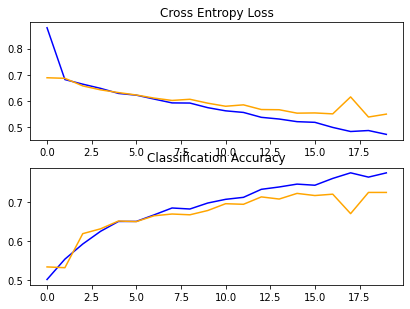

63/63 [==============================] - 1s 7ms/step - loss: 51.5029 - accuracy: 0.7260
fold time:  0:01:38.363249
Fold 0
Test Index Start:1000
Test Set Size:1000


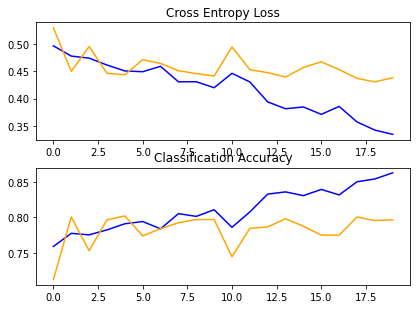

63/63 [==============================] - 0s 7ms/step - loss: 57.7539 - accuracy: 0.7755
fold time:  0:01:33.610713
Fold 0
Test Index Start:2000
Test Set Size:1000


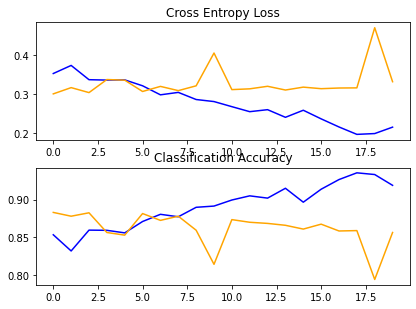

63/63 [==============================] - 0s 7ms/step - loss: 65.2702 - accuracy: 0.7985
fold time:  0:01:32.970907
Fold 0
Test Index Start:3000
Test Set Size:1000


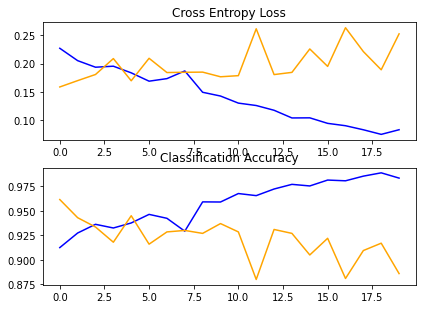

63/63 [==============================] - 0s 7ms/step - loss: 80.3197 - accuracy: 0.8165
fold time:  0:01:33.479234
Fold 0
Test Index Start:4000
Test Set Size:1000


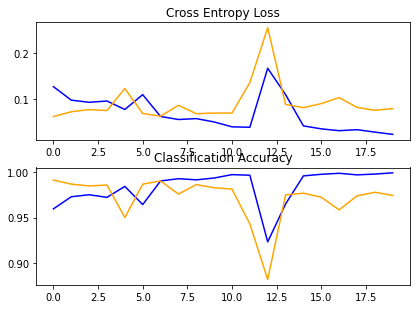

63/63 [==============================] - 0s 7ms/step - loss: 20.9235 - accuracy: 0.9300
fold time:  0:01:33.383909
0:01:34.361602
Batch Size: 512
Fold 0
Test Index Start:0
Test Set Size:1000


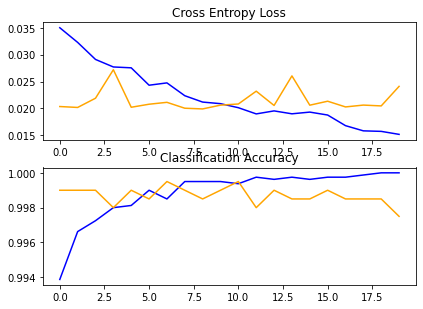

63/63 [==============================] - 0s 7ms/step - loss: 1.2471 - accuracy: 0.9910
fold time:  0:01:36.751335
Fold 0
Test Index Start:1000
Test Set Size:1000


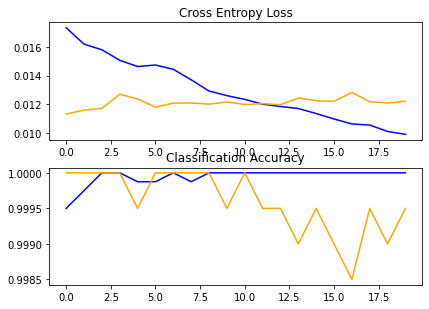

63/63 [==============================] - 0s 7ms/step - loss: 1.9314 - accuracy: 0.9880
fold time:  0:01:33.907709
Fold 0
Test Index Start:2000
Test Set Size:1000


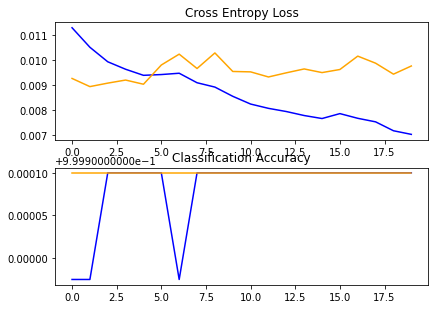

63/63 [==============================] - 0s 7ms/step - loss: 0.2762 - accuracy: 0.9960
fold time:  0:01:33.688108
Fold 0
Test Index Start:3000
Test Set Size:1000


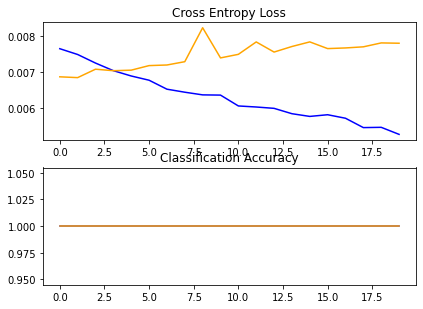

63/63 [==============================] - 0s 7ms/step - loss: 1.1349 - accuracy: 0.9910
fold time:  0:01:43.220210
Fold 0
Test Index Start:4000
Test Set Size:1000


In [ ]:
network = Sequential()
network.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',
                   input_shape=(200, 200, 3)))
network.add(MaxPooling2D((2, 2)))
network.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
network.add(MaxPooling2D((2, 2)))
network.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
network.add(MaxPooling2D((2, 2)))
network.add(Flatten())
network.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
network.add(Dense(1, activation='sigmoid'))
opt = SGD(learning_rate=0.001, momentum=0.9)
network.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

for bs in [256, 512, 1024]:
    print(f"Batch Size: {bs}")
    kfold(network, cat_imgs, dog_imgs, bs)